In [162]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('Vertical_Flight_Efficiency_cdo_cco.xlsx','DATA')

,YEAR,MONTH_NUM,MONTH_MON,APT_ICAO,APT_NAME,STATE_NAME,NBR_FLIGHTS_DESCENT,TOT_DIST_LEVEL_NM_DESCENT,TOT_DIST_LEVEL_NM_DESCENT_BELOW_7000,TOT_TIME_LEVEL_SECONDS_DESCENT,...,TOT_DIST_LEVEL_NM_CLIMB,TOT_DIST_LEVEL_NM_CLIMB_BELOW_10000,TOT_TIME_LEVEL_SECONDS_CLIMB,TOT_TIME_LEVEL_SECONDS_CLIMB_BELOW_10000,MEDIAN_CCO_ALT,NBR_CCO_FLIGHTS,NBR_CCO_FLIGHTS_BELOW_10000,TOT_DELTA_CO2_KG_CLIMB,TOT_DELTA_CO2_KG_CLIMB_BELOW_10000,Airport Name
1,2015,1,JAN,EBBE,Beauvechain,Belgium,7,169.688987,169.688987,4780,...,37.022418,37.022418,1140.0,1140.0,6000.000000,5.0,5.0,0.00000,0.00000,Beauvechain (EBBE)
887,2015,2,FEB,EBBE,Beauvechain,Belgium,16,311.601334,311.601334,8180,...,58.950522,58.950522,1260.0,1260.0,6000.000000,6.0,6.0,0.00000,0.00000,Beauvechain (EBBE)
1772,2015,3,MAR,EBBE,Beauvechain,Belgium,9,243.755792,243.755792,7120,...,55.893990,55.893990,1780.0,1780.0,7000.000000,5.0,5.0,0.00000,0.00000,Beauvechain (EBBE)
2711,2015,4,APR,EBBE,Beauvechain,Belgium,7,248.558149,248.558149,6760,...,10.691145,10.691145,300.0,300.0,6000.000000,7.0,7.0,0.00000,0.00000,Beauvechain (EBBE)
3663,2015,5,MAY,EBBE,Beauvechain,Belgium,6,355.620099,355.620099,8560,...,45.189885,45.189885,1260.0,1260.0,6000.000000,2.0,2.0,0.00000,0.00000,Beauvechain (EBBE)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85897,2022,7,JUL,EBBE,Beauvechain,Belgium,11,315.883009,284.619890,9840,...,20.393969,20.393969,720.0,720.0,6000.000000,11.0,11.0,5.33295,5.33295,Beauvechain (EBBE)
86899,2022,8,AUG,EBBE,Beauvechain,Belgium,4,37.268269,37.268269,1040,...,119.619484,119.619484,3860.0,3860.0,5515.727817,3.0,3.0,0.00000,0.00000,Beauvechain (EBBE)
87900,2022,9,SEP,EBBE,Beauvechain,Belgium,3,38.011160,33.211060,900,...,7.352011,0.000000,140.0,0.0,7000.000000,2.0,3.0,13.62144,0.00000,Beauvechain (EBBE)
88898,2022,10,OCT,EBBE,Beauvechain,Belgium,6,218.671298,99.579968,3780,...,2.159827,2.159827,60.0,60.0,5875.000000,3.0,3.0,0.00000,0.00000,Beauvechain (EBBE)


In [280]:
airports_df = pd.read_csv('airport-codes_csv.csv')
airports_df

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"
...,...,...,...,...,...,...,...,...,...,...,...,...
57416,ZYYK,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,CN-21,Yingkou,ZYYK,YKH,NaN,"122.3586, 40.542524"
57417,ZYYY,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,CN-21,Shenyang,ZYYY,NaN,NaN,"123.49600219726562, 41.784400939941406"
57418,ZZ-0001,heliport,Sealand Helipad,40.0,EU,GB,GB-ENG,Sealand,NaN,NaN,NaN,"1.4825, 51.894444"
57419,ZZ-0002,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,TF-U-A,Grande Glorieuse,NaN,NaN,NaN,"47.296388888900005, -11.584277777799999"


In [344]:
def tweak_airports(df):
    
    def coordinates(df):
        df[['lon','lat']] = df.coordinates.str.split(',',expand=True)
        return df
    
    special_case = pd.DataFrame({'ident':'LESJ','name':'Palma De Mallorca or Palma/Son San Juan',
                                 'elevation_ft':27,'iso_country':'ES','municipality':'Palma De Mallorca',
                                 'lon':2.73881,'lat':39.551700},index=[0])
    clean = (
        df
        .loc[:,['ident','name','elevation_ft','iso_country','municipality','coordinates']]
        .pipe(coordinates)
        .drop(columns=['coordinates'])
        .astype({'lat':'float','lon':'float'})
        .assign(ident = lambda df_: df_.ident.str.replace('LUZ','EPLB'))
        .assign(ident = lambda df_: df_.ident.str.replace('BKPR','LYPR'))
        .assign(ident = lambda df_: df_.ident.str.replace('EPCH','EPRU'))
        .assign(ident = lambda df_: df_.ident.str.replace('ENXA','ENLE'))
        
    )
        
    return pd.concat([clean,special_case],ignore_index=True)


airports_df.info(memory_usage='deep')
cairports_df = tweak_airports(airports_df)
cairports_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57421 entries, 0 to 57420
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         57421 non-null  object 
 1   type          57421 non-null  object 
 2   name          57421 non-null  object 
 3   elevation_ft  49608 non-null  float64
 4   continent     28978 non-null  object 
 5   iso_country   57175 non-null  object 
 6   iso_region    57421 non-null  object 
 7   municipality  51527 non-null  object 
 8   gps_code      41561 non-null  object 
 9   iata_code     9225 non-null   object 
 10  local_code    30030 non-null  object 
 11  coordinates   57421 non-null  object 
dtypes: float64(1), object(11)
memory usage: 36.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57422 entries, 0 to 57421
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         57422 non-null  object 

In [289]:
cairports_df

,ident,name,elevation_ft,iso_country,municipality,coordinates,lat,lon
0,00A,Total Rf Heliport,11.0,US,Bensalem,"-74.93360137939453, 40.07080078125",-74.93360137939453,40.07080078125
1,00AA,Aero B Ranch Airport,3435.0,US,Leoti,"-101.473911, 38.704022",-101.473911,38.704022
2,00AK,Lowell Field,450.0,US,Anchor Point,"-151.695999146, 59.94919968",-151.695999146,59.94919968
3,00AL,Epps Airpark,820.0,US,Harvest,"-86.77030181884766, 34.86479949951172",-86.77030181884766,34.86479949951172
4,00AR,Newport Hospital & Clinic Heliport,237.0,US,Newport,"-91.254898, 35.6087",-91.254898,35.6087
...,...,...,...,...,...,...,...,...
57416,ZYYK,Yingkou Lanqi Airport,0.0,CN,Yingkou,"122.3586, 40.542524",122.3586,40.542524
57417,ZYYY,Shenyang Dongta Airport,NaN,CN,Shenyang,"123.49600219726562, 41.784400939941406",123.49600219726562,41.784400939941406
57418,ZZ-0001,Sealand Helipad,40.0,GB,Sealand,"1.4825, 51.894444",1.4825,51.894444
57419,ZZ-0002,Glorioso Islands Airstrip,11.0,TF,Grande Glorieuse,"47.296388888900005, -11.584277777799999",47.296388888900005,-11.584277777799999


In [259]:
def tweak_airline(df):
    included_airports = df.APT_ICAO.value_counts().nlargest(900).index.values
    return (
        df
        .assign(DATE = pd.to_datetime(
                                    df.loc[:,'YEAR':'MONTH_NUM']
                                    .assign(DAY=1)
                                    .rename(columns={'MONTH_NUM':'MONTH'})
                                    )
               )
        .set_index('DATE')
        .drop(columns=['YEAR','MONTH_NUM','MONTH_MON','Airport Name'])
        .pipe(lambda df_: df_[df_.APT_ICAO.isin(included_airports)])
        .astype({'APT_ICAO':'category',
                'APT_NAME':'category',
                'STATE_NAME':'category'})
        .assign(Descent = lambda df_: (df_.TOT_TIME_LEVEL_SECONDS_DESCENT 
                                       / df_.NBR_FLIGHTS_DESCENT),
                Climb = lambda df_: (df_.TOT_TIME_LEVEL_SECONDS_CLIMB 
                                     / df_.NBR_FLIGHTS_CLIMB),
                Descent_below = lambda df_: (df_.TOT_TIME_LEVEL_SECONDS_DESCENT_BELOW_7000 
                                             / df_.NBR_FLIGHTS_DESCENT),
                Climb_below = lambda df_: (df_.TOT_TIME_LEVEL_SECONDS_CLIMB_BELOW_10000 
                                           / df_.NBR_FLIGHTS_CLIMB),
                pct_cdo = lambda df_: (df_.NBR_CDO_FLIGHTS 
                                       / df_.NBR_FLIGHTS_DESCENT),
                pct_cco = lambda df_: (df_.NBR_CCO_FLIGHTS 
                                       / df_.NBR_FLIGHTS_CLIMB),
                pct_cdo_below = lambda df_: (df_.NBR_CDO_FLIGHTS_BELOW_7000 
                                       / df_.NBR_FLIGHTS_DESCENT),
                pct_cco_below = lambda df_: (df_.NBR_CCO_FLIGHTS_BELOW_10000
                                       / df_.NBR_FLIGHTS_CLIMB)
                )
    )

df.info(memory_usage='deep')
cdf = tweak_airline(df)
cdf.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90796 entries, 0 to 90795
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   YEAR                                       90796 non-null  int64  
 1   MONTH_NUM                                  90796 non-null  int64  
 2   MONTH_MON                                  90796 non-null  object 
 3   APT_ICAO                                   90796 non-null  object 
 4   APT_NAME                                   90796 non-null  object 
 5   STATE_NAME                                 90796 non-null  object 
 6   NBR_FLIGHTS_DESCENT                        90796 non-null  int64  
 7   TOT_DIST_LEVEL_NM_DESCENT                  90796 non-null  float64
 8   TOT_DIST_LEVEL_NM_DESCENT_BELOW_7000       90796 non-null  float64
 9   TOT_TIME_LEVEL_SECONDS_DESCENT             90796 non-null  int64  
 10  TOT_TIME_LEVEL_SECONDS

In [260]:
df.APT_ICAO.value_counts()

EBAW    95
LFCC    95
LFCR    95
LFDN    95
LFEC    95
        ..
EDHP     1
LGAG     1
LOXK     1
EIIM     1
LIET     1
Name: APT_ICAO, Length: 1231, dtype: int64

In [261]:
cdf.APT_ICAO.value_counts()

EBAW    95
LFCC    95
LFCR    95
LFDN    95
LFEC    95
        ..
EGSU    67
EISG    66
GMAA    66
EDAE    66
EDWR    66
Name: APT_ICAO, Length: 900, dtype: int64

In [251]:
cdf

,APT_ICAO,APT_NAME,STATE_NAME,NBR_FLIGHTS_DESCENT,TOT_DIST_LEVEL_NM_DESCENT,TOT_DIST_LEVEL_NM_DESCENT_BELOW_7000,TOT_TIME_LEVEL_SECONDS_DESCENT,TOT_TIME_LEVEL_SECONDS_DESCENT_BELOW_7000,MEDIAN_CDO_ALT,NBR_CDO_FLIGHTS,...,TOT_DELTA_CO2_KG_CLIMB,TOT_DELTA_CO2_KG_CLIMB_BELOW_10000,Descent,Climb,Descent_below,Climb_below,pct_cdo,pct_cco,pct_cdo_below,pct_cco_below
DATE,,,,,,,,,,,,,,,,,,,,,
2015-01-01,EBAW,Antwerpen Deurne,Belgium,343,4148.460184,2223.595073,73600,49760,3032.370103,85,...,559.502401,130.283198,214.577259,49.326284,145.072886,23.283988,0.247813,0.791541,0.317784,0.930514
2015-01-01,EBBE,Beauvechain,Belgium,7,169.688987,169.688987,4780,4780,2903.333333,0,...,0.000000,0.000000,682.857143,162.857143,682.857143,162.857143,0.000000,0.714286,0.000000,0.714286
2015-01-01,EBBL,Kleine Brogel,Belgium,7,54.574931,20.047403,580,280,3000.000000,3,...,0.000000,0.000000,82.857143,73.333333,40.000000,0.000000,0.428571,0.666667,0.571429,1.000000
2015-01-01,EBBR,Brussels,Belgium,8207,150501.189129,24019.820435,1705480,481800,8000.000000,1891,...,56477.198959,3380.171219,207.807969,30.934428,58.705983,0.880779,0.230413,0.755839,0.508590,0.982968
2015-01-01,EBCI,Charleroi,Belgium,1684,34298.796333,4193.082197,379940,78280,19999.444444,320,...,16666.046934,5045.674466,225.617577,54.718209,46.484561,6.452537,0.190024,0.652537,0.551069,0.927164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,LZZI,Zilina,Slovakia,9,47.404087,8.540879,500,200,19000.000000,5,...,2.056768,2.056768,55.555556,4.000000,22.222222,4.000000,0.555556,0.900000,0.666667,0.900000
2022-11-01,UDSG,GYUMRI,Armenia,7,19.110925,2.005554,240,40,16050.000000,3,...,34.592910,0.000000,34.285714,34.285714,5.714286,0.000000,0.428571,0.571429,0.857143,1.000000
2022-11-01,UDYE,EREBUNI (MIL),Armenia,12,51.528011,9.631649,780,160,17543.518519,6,...,126.345500,0.000000,65.000000,9.090909,13.333333,0.000000,0.500000,0.909091,0.666667,1.000000


In [266]:
cairports_df

,ICAO,Name,Country,Alt,Lat,Lon
0,AYGA,GOROKA,PAPUA NEW GUINEA,1610,-6.082,145.392
1,AYLA,NaN,PAPUA NEW GUINEA,0,0.000,0.000
2,AYMD,MADANG,PAPUA NEW GUINEA,7,-5.207,145.789
3,AYMH,MOUNT HAGEN,PAPUA NEW GUINEA,1643,-5.826,144.296
4,AYNZ,NADZAB,PAPUA NEW GUINEA,73,-6.570,146.726
...,...,...,...,...,...,...
9295,ZYTK,NaN,CHINA,0,0.000,0.000
9296,ZYTL,ZHOUSHUIZI,CHINA,33,38.966,121.538
9297,ZYXC,NaN,CHINA,0,0.000,0.000
9298,ZYYC,NaN,CHINA,0,0.000,0.000


In [345]:
mergeddf = cdf.merge(cairports_df, how='left',left_on='APT_ICAO',right_on='ident',validate='m:1')
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82833 entries, 0 to 82832
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   APT_ICAO                                   82833 non-null  object  
 1   APT_NAME                                   82833 non-null  category
 2   STATE_NAME                                 82833 non-null  category
 3   NBR_FLIGHTS_DESCENT                        82833 non-null  int64   
 4   TOT_DIST_LEVEL_NM_DESCENT                  82833 non-null  float64 
 5   TOT_DIST_LEVEL_NM_DESCENT_BELOW_7000       82833 non-null  float64 
 6   TOT_TIME_LEVEL_SECONDS_DESCENT             82833 non-null  int64   
 7   TOT_TIME_LEVEL_SECONDS_DESCENT_BELOW_7000  82833 non-null  int64   
 8   MEDIAN_CDO_ALT                             82833 non-null  float64 
 9   NBR_CDO_FLIGHTS                            82833 non-null  int64   
 10  NBR_CDO_FL

,APT_ICAO,APT_NAME,STATE_NAME,NBR_FLIGHTS_DESCENT,TOT_DIST_LEVEL_NM_DESCENT,TOT_DIST_LEVEL_NM_DESCENT_BELOW_7000,TOT_TIME_LEVEL_SECONDS_DESCENT,TOT_TIME_LEVEL_SECONDS_DESCENT_BELOW_7000,MEDIAN_CDO_ALT,NBR_CDO_FLIGHTS,...,pct_cco,pct_cdo_below,pct_cco_below,ident,name,elevation_ft,iso_country,municipality,lon,lat


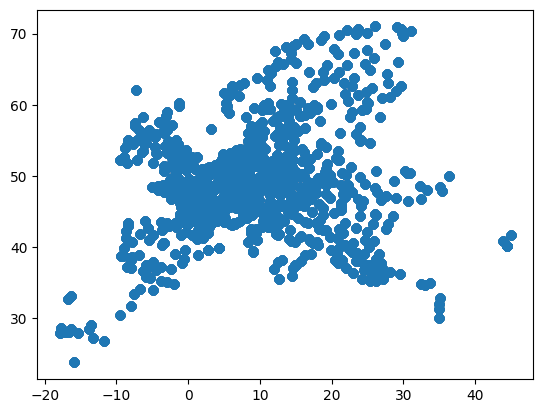

In [346]:
plt.plot(mergeddf.lon,mergeddf.lat,'o')
mergeddf[mergeddf.lat<10]

<AxesSubplot: xlabel='DATE'>

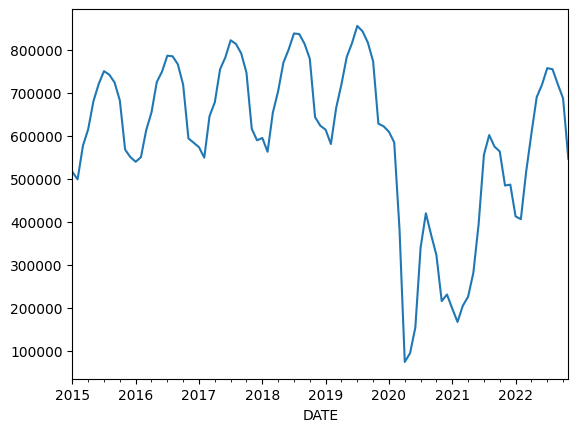

In [50]:
cdf.groupby(pd.Grouper(freq='1M')).NBR_FLIGHTS_DESCENT.sum().plot()

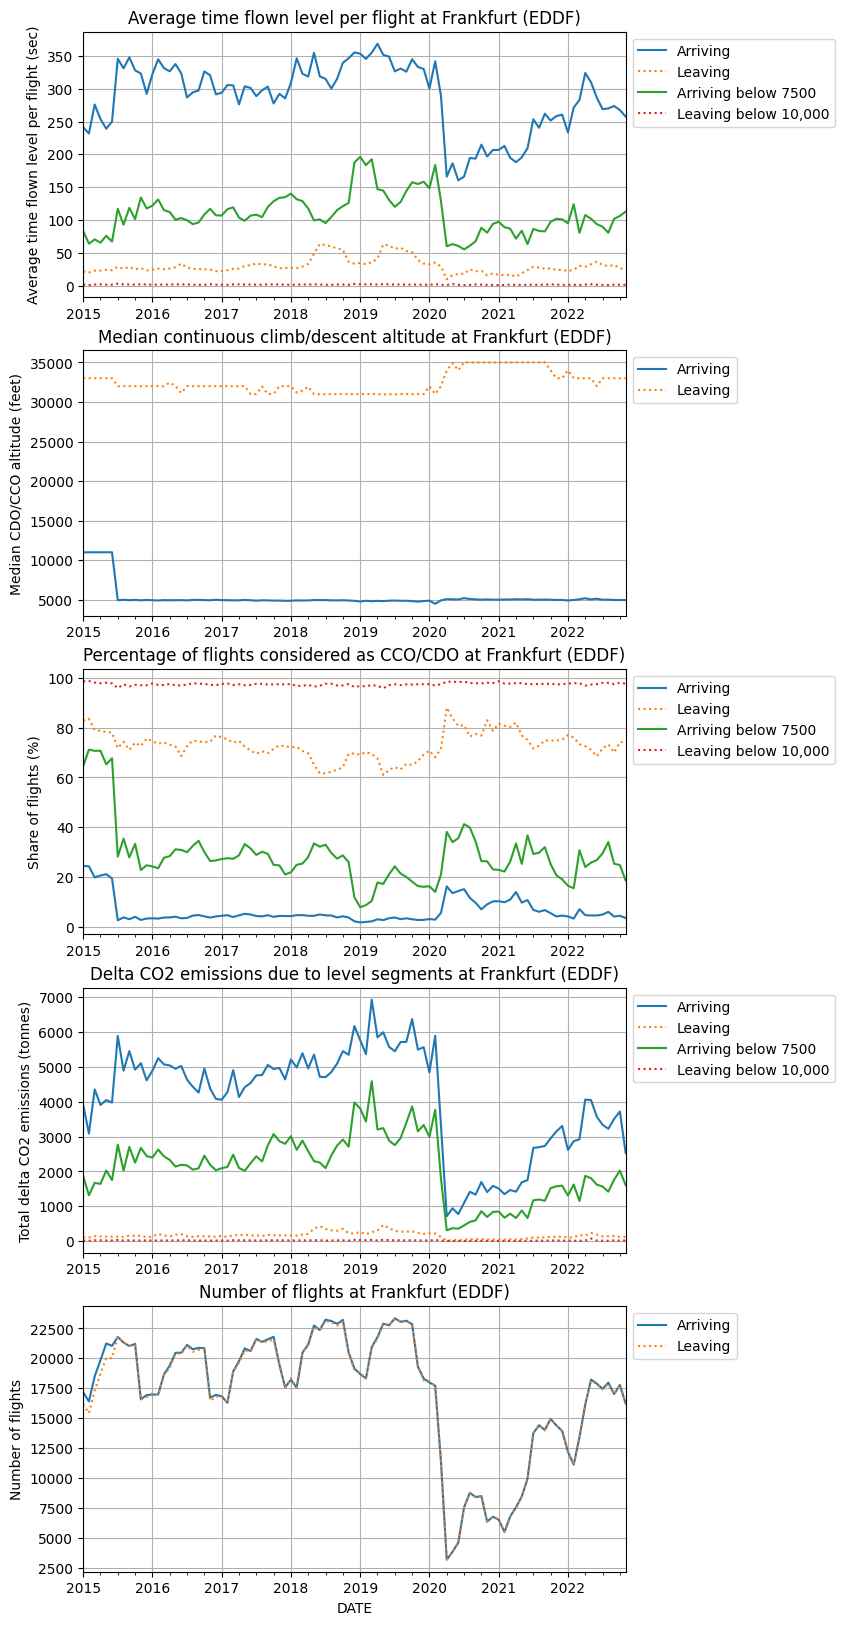

In [253]:
airport_code = "EDDF"
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(7,20))
airport = cdf.query('APT_ICAO == @airport_code')

(airport
 .loc[:,'Descent':'Climb_below']
 .plot(grid=True,
       xlabel='',
       ylabel='Average time flown level per flight (sec)',
       title=f'Average time flown level per flight at '
       f'{airport.APT_NAME.iloc[0]} ({airport.APT_ICAO.iloc[0]})',
       style=['-',':','-',':'],
       ax=ax1
      )
)
ax1.legend(['Arriving', 'Leaving',
            'Arriving below 7500', 'Leaving below 10,000'],
           loc='upper left',bbox_to_anchor=(1, 1))

(airport
 .loc[:,['MEDIAN_CDO_ALT','MEDIAN_CCO_ALT']]
 .plot(grid=True,
       xlabel='',
       ylabel='Median CDO/CCO altitude (feet)',
       title=f'Median continuous climb/descent altitude at '
       f'{airport.APT_NAME.iloc[0]} ({airport.APT_ICAO.iloc[0]})',
       style=['-',':'],
       ax=ax2
      )
)
ax2.legend(['Arriving', 'Leaving'],loc='upper left',bbox_to_anchor=(1, 1))

(airport
 .loc[:,'pct_cdo':'pct_cco_below']
 .mul(100)
 .plot(grid=True,
       xlabel='',
       ylabel='Share of flights (%)',
       title=f'Percentage of flights considered as CCO/CDO at ' \
       f'{airport.APT_NAME.iloc[0]} ({airport.APT_ICAO.iloc[0]})',
       style=['-',':','-',':'],
       ax=ax3
      )
)
ax3.legend(['Arriving', 'Leaving',
            'Arriving below 7500', 'Leaving below 10,000'],
           loc='upper left',bbox_to_anchor=(1, 1))

(airport
 .loc[:,['TOT_DELTA_CO2_KG_DESCENT','TOT_DELTA_CO2_KG_CLIMB',
         'TOT_DELTA_CO2_KG_DESCENT_BELOW_7000','TOT_DELTA_CO2_KG_CLIMB_BELOW_10000']]
 .div(1000)
 .plot(grid=True,
       xlabel='',
       ylabel='Total delta CO2 emissions (tonnes)',
       title=f'Delta CO2 emissions due to level segments at ' \
       f'{airport.APT_NAME.iloc[0]} ({airport.APT_ICAO.iloc[0]})',
       style=['-',':','-',':'],
       ax=ax4
      )
)
ax4.legend(['Arriving', 'Leaving',
            'Arriving below 7500', 'Leaving below 10,000'],
           loc='upper left',bbox_to_anchor=(1, 1))

(airport
 .loc[:,['NBR_FLIGHTS_DESCENT','NBR_FLIGHTS_CLIMB']]
 .plot(grid=True,
       ylabel='Number of flights',
       title=f'Number of flights at '\
       f'{airport.APT_NAME.iloc[0]} ({airport.APT_ICAO.iloc[0]})',
       style=['-',':'],
       ax=ax5,
       
      )
)
_=ax5.legend(['Arriving', 'Leaving'],loc='upper left',bbox_to_anchor=(1, 1))

In [255]:
airports_df = pd.read_csv('GlobalAirportDatabase.txt',sep=':',
                          names=['ICAO','IATA','Name','City','Country',
                                 'LatDeg','LatMin','LatSec','LatDir',
                                 'LonDeg','LonMin','LonSec','LonDir',
                                 'Alt','Lat','Lon'])
airports_df = airports_df.iloc[:,[0,2,4,13,14,15]]

In [254]:
airports_df[airports_df.ICAO == 'EBAW']

,ICAO,Name,Country,Alt,Lat,Lon
556,EBAW,DEURNE,BELGIUM,12,51.19,4.463


<AxesSubplot: >

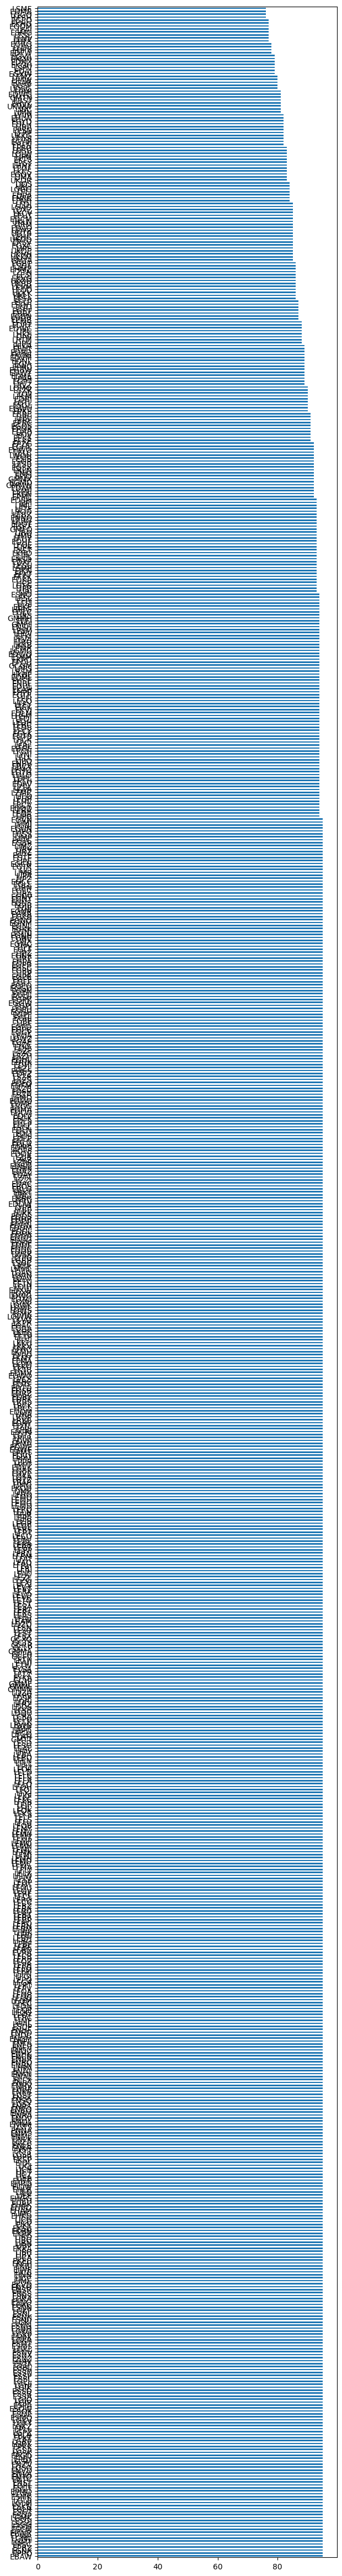

In [232]:
cdf.APT_ICAO.value_counts()[cdf.APT_ICAO.value_counts() > 75].plot.barh(figsize=(7,60))

In [222]:
cdf[cdf.APT_ICAO == 'ESMP']

,APT_ICAO,APT_NAME,STATE_NAME,NBR_FLIGHTS_DESCENT,TOT_DIST_LEVEL_NM_DESCENT,TOT_DIST_LEVEL_NM_DESCENT_BELOW_7000,TOT_TIME_LEVEL_SECONDS_DESCENT,TOT_TIME_LEVEL_SECONDS_DESCENT_BELOW_7000,MEDIAN_CDO_ALT,NBR_CDO_FLIGHTS,...,TOT_DELTA_CO2_KG_CLIMB,TOT_DELTA_CO2_KG_CLIMB_BELOW_10000,Descent,Climb,Descent_below,Climb_below,pct_cdo,pct_cco,pct_cdo_below,pct_cco_below
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-01,ESMP,Anderstorp,Sweden,1,0.0,0.0,0,0,8000.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
